[Accessing Preloaded Datasets of sklearn](https://joshlawman.com/accessing-scikit-learns-preloaded-datasets/)

[Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)

[Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

[Using TF-IDF to convert unstructured text to useful features](https://www.youtube.com/watch?v=hXNbFNCgPfY)

[An Introduction to Clustering Algorithms in Python](https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097)

# Unsupervised Learning


Anton Akusok

<anton.akusok@arcada.fi>

Slack: `@Anton Akusok`

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

# 1) Data normalization

### Look at features of Linnerud dataset, tell what is the problem with them

In [1]:
%load_ext watermark
%watermark -p numpy,pandas,matplotlib,seaborn,sklearn

numpy 1.15.4
pandas 0.25.1
matplotlib 2.2.3
seaborn 0.9.0
sklearn 0.20.0


In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Dictionary-like object, the interesting attributes are: `data` and `target`, the two multivariate datasets, with ‘data’ corresponding to the exercise and ‘target’ corresponding to the physiological measurements, as well as ‘feature_names’ and ‘target_names’. In addition, you will also have access to ‘data_filename’, the physical location of linnerud data csv dataset, and ‘target_filename’, the physical location of linnerud targets csv datataset (added in version 0.20).

<img src="Linnerrud_dataset.PNG">

In [3]:
# import dataset from sklearn
from sklearn.datasets import load_linnerud

dataset = load_linnerud()

print("Feature names: {}".format(dataset.feature_names))
print("Target names: {}".format(dataset.target_names))

Feature names: ['Chins', 'Situps', 'Jumps']
Target names: ['Weight', 'Waist', 'Pulse']


In [4]:
# create datframe of data and target to investigate

data = dataset.data
target = dataset.target

data_df = pd.DataFrame(dataset.data,index=np.arange(0,len(data)),columns=["Chins","Situps","Jumps"])
target_df = pd.DataFrame(dataset.target,index=np.arange(0,len(target)),columns=["Weight","Waist","Pulse"])

In [5]:
# general information of data and target
print(data_df.info(),"\n")
print(target_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
Chins     20 non-null float64
Situps    20 non-null float64
Jumps     20 non-null float64
dtypes: float64(3)
memory usage: 640.0 bytes
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
Weight    20 non-null float64
Waist     20 non-null float64
Pulse     20 non-null float64
dtypes: float64(3)
memory usage: 640.0 bytes
None


In [6]:
print(data_df.head(),"\n")
print(target_df.head())

   Chins  Situps  Jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0 

   Weight  Waist  Pulse
0   191.0   36.0   50.0
1   189.0   37.0   52.0
2   193.0   38.0   58.0
3   162.0   35.0   62.0
4   189.0   35.0   46.0


C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


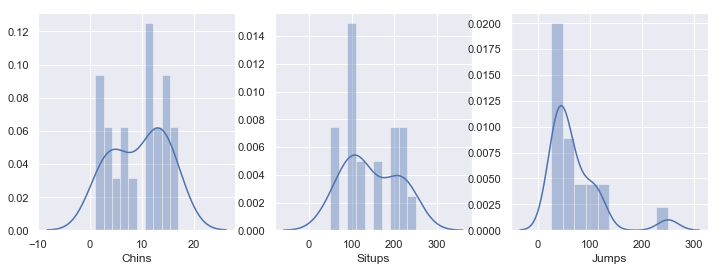

In [7]:
# visualizing both data and target
plt.rcParams["figure.figsize"] = [12,4]
fig, ax = plt.subplots(1,3)

sns.distplot(data_df["Chins"],ax=ax[0],bins=10)
sns.distplot(data_df["Situps"],ax=ax[1],bins=10)
sns.distplot(data_df["Jumps"],ax=ax[2],bins=10)
# sns.distplot(target_df["Weight"],ax=ax[1][0],bins=10)
# sns.distplot(target_df["Waist"],ax=ax[1][1],bins=10)
# sns.distplot(target_df["Pulse"],ax=ax[1][2],bins=10)

plt.show()

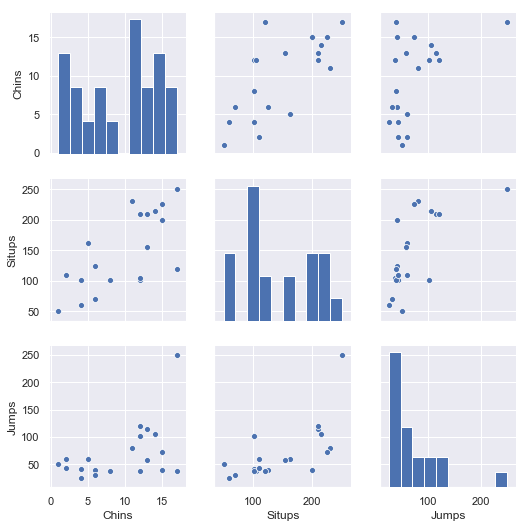

In [8]:
# pair plotting for data
sns.pairplot(data_df)

In [9]:
# pair plotting for target
# sns.pairplot(target_df)

### Normalize these features using a correct method. Plot original vs normalized probability density

In [10]:
# splitting the dataset to train and test
from sklearn.model_selection import train_test_split

X_t, X_s, y_t, y_s = train_test_split(data,target,random_state=24)
X_t.shape, X_s.shape, y_t.shape, y_s.shape

((15, 3), (5, 3), (15, 3), (5, 3))

In [11]:
# define an estimator
from sklearn.linear_model import Lasso

model = Lasso().fit(X_t,y_t)
model.score(X_s,y_s)*100

-31.46438028970528

In [12]:
# Use StandardScaler and RobustScaler
from sklearn.preprocessing import StandardScaler,RobustScaler,QuantileTransformer,PowerTransformer

sts = StandardScaler().fit(X_t)
rbs = RobustScaler().fit(X_t)

qts = QuantileTransformer(output_distribution="normal").fit(X_t)
pts = PowerTransformer().fit(X_t)

In [13]:
# Using StandardScaler
model = Lasso().fit(sts.transform(X_t),y_t)
model.score(sts.transform(X_s),y_s)*100

-23.39697429812744

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


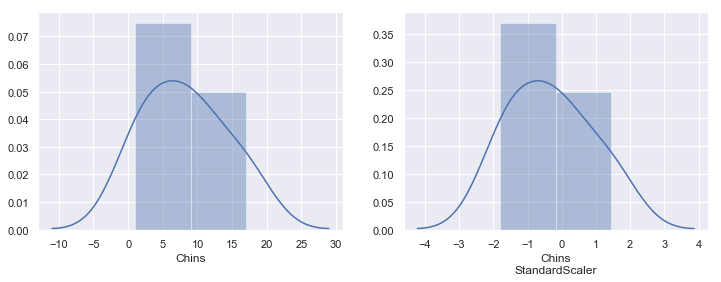

In [14]:
names = ['Chins','Situps','Jumps']

i = 0
data_original = pd.Series(X_s[:,i],name=names[i])
data_sts = pd.Series(sts.transform(X_s)[:,i],name=names[i]+"\nStandardScaler")

fig, ax = plt.subplots(1,2)
sns.distplot(data_original,ax=ax[0])
sns.distplot(data_sts,ax=ax[1])
plt.show()

In [15]:
# Using RobustScaler
model = Lasso().fit(rbs.transform(X_t),y_t)
model.score(rbs.transform(X_s),y_s)*100

-22.309641582579474

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


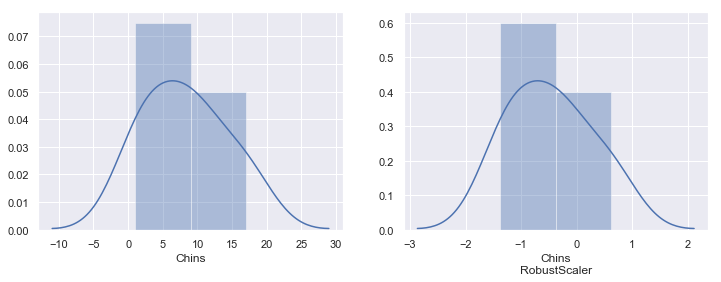

In [16]:
names = ['Chins','Situps','Jumps']

i = 0
data_original = pd.Series(X_s[:,i],name=names[i])
data_rbs = pd.Series(rbs.transform(X_s)[:,i],name=names[i]+"\nRobustScaler")

fig, ax = plt.subplots(1,2)
sns.distplot(data_original,ax=ax[0])
sns.distplot(data_rbs,ax=ax[1])
plt.show()

In [17]:
# Using QuantileTransformer
model = Lasso().fit(qts.transform(X_t),y_t)
model.score(qts.transform(X_s),y_s)*100

25.828500615987544

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


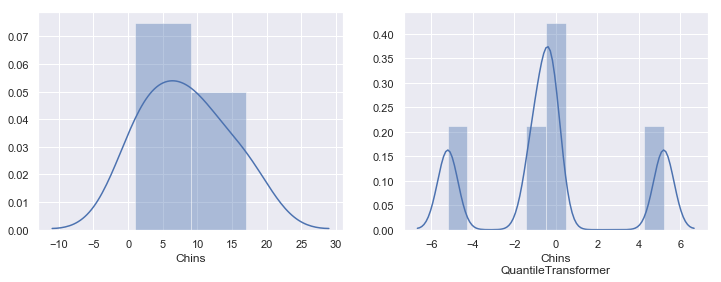

In [18]:
names = ['Chins','Situps','Jumps']

i = 0
data_original = pd.Series(X_s[:,i],name=names[i])
data_qts = pd.Series(qts.transform(X_s)[:,i],name=names[i]+"\nQuantileTransformer")

fig, ax = plt.subplots(1,2)
sns.distplot(data_original,ax=ax[0])
sns.distplot(data_qts,ax=ax[1])
plt.show()

In [19]:
# Using PowerTransformer
model = Lasso().fit(pts.transform(X_t),y_t)
model.score(pts.transform(X_s),y_s)*100

-4.250833589369416

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


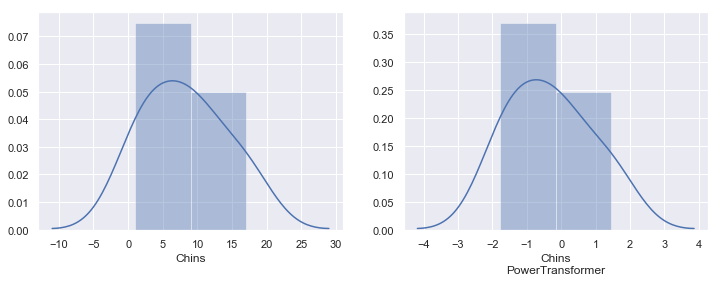

In [20]:
names = ['Chins','Situps','Jumps']

i = 0
data_original = pd.Series(X_s[:,i],name=names[i])
data_pts = pd.Series(pts.transform(X_s)[:,i],name=names[i]+"\nPowerTransformer")

fig, ax = plt.subplots(1,2)
sns.distplot(data_original,ax=ax[0])
sns.distplot(data_pts,ax=ax[1])
plt.show()

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


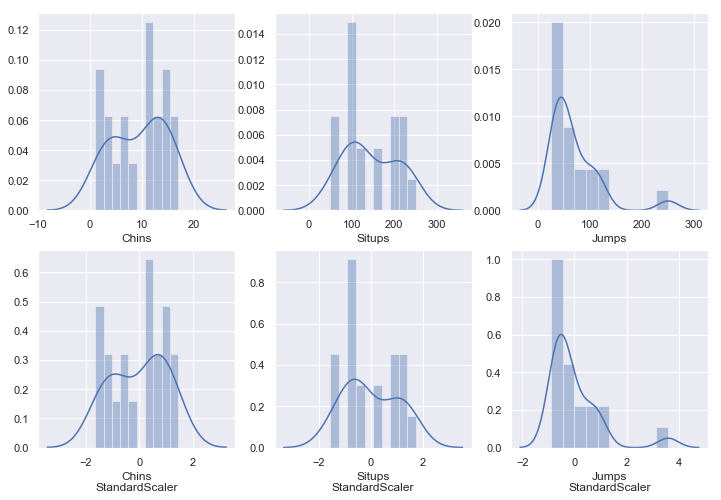

In [21]:
# original data vs StandardScaler data

sts = StandardScaler().fit(data_df)
data_sts = sts.transform(data_df)

plt.rcParams["figure.figsize"] = [12,8]
fig, ax = plt.subplots(2,3)

sns.distplot(data_df["Chins"],ax=ax[0][0],bins=10)
sns.distplot(data_df["Situps"],ax=ax[0][1],bins=10)
sns.distplot(data_df["Jumps"],ax=ax[0][2],bins=10)
sns.distplot(pd.Series(data_sts[:,0],name="Chins\nStandardScaler"),ax=ax[1][0],bins=10)
sns.distplot(pd.Series(data_sts[:,1],name="Situps\nStandardScaler"),ax=ax[1][1],bins=10)
sns.distplot(pd.Series(data_sts[:,2],name="Jumps\nStandardScaler"),ax=ax[1][2],bins=10)

plt.show()

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


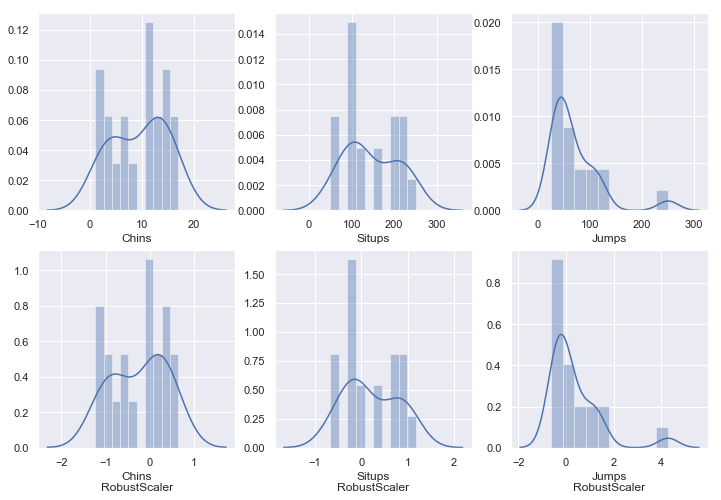

In [22]:
# original data vs RobustScaler data

rbs = RobustScaler().fit(data_df)
data_rbs = rbs.transform(data_df)

plt.rcParams["figure.figsize"] = [12,8]
fig, ax = plt.subplots(2,3)

sns.distplot(data_df["Chins"],ax=ax[0][0],bins=10)
sns.distplot(data_df["Situps"],ax=ax[0][1],bins=10)
sns.distplot(data_df["Jumps"],ax=ax[0][2],bins=10)
sns.distplot(pd.Series(data_rbs[:,0],name="Chins\nRobustScaler"),ax=ax[1][0],bins=10)
sns.distplot(pd.Series(data_rbs[:,1],name="Situps\nRobustScaler"),ax=ax[1][1],bins=10)
sns.distplot(pd.Series(data_rbs[:,2],name="Jumps\nRobustScaler"),ax=ax[1][2],bins=10)

plt.show()

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


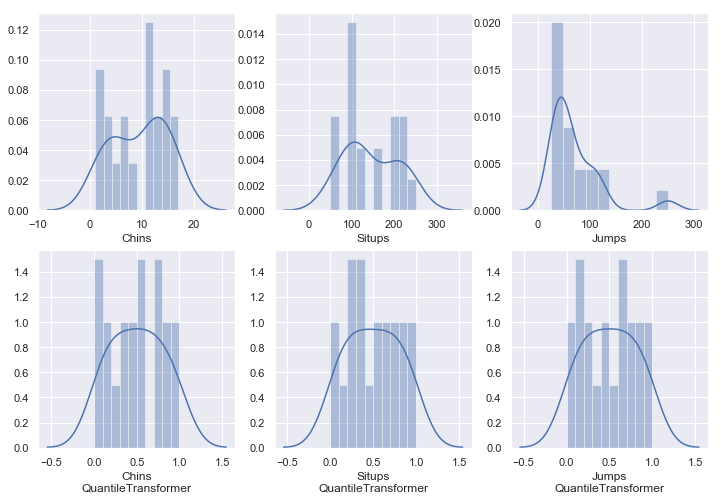

In [23]:
# original data vs QuantileTransformer data

qts = QuantileTransformer().fit(data_df)
data_qts = qts.transform(data_df)

plt.rcParams["figure.figsize"] = [12,8]
fig, ax = plt.subplots(2,3)

sns.distplot(data_df["Chins"],ax=ax[0][0],bins=10)
sns.distplot(data_df["Situps"],ax=ax[0][1],bins=10)
sns.distplot(data_df["Jumps"],ax=ax[0][2],bins=10)
sns.distplot(pd.Series(data_qts[:,0],name="Chins\nQuantileTransformer"),ax=ax[1][0],bins=10)
sns.distplot(pd.Series(data_qts[:,1],name="Situps\nQuantileTransformer"),ax=ax[1][1],bins=10)
sns.distplot(pd.Series(data_qts[:,2],name="Jumps\nQuantileTransformer"),ax=ax[1][2],bins=10)

plt.show()

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


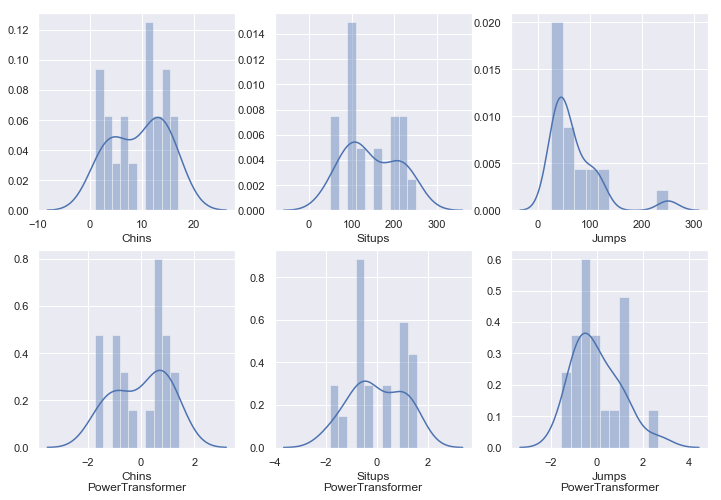

In [24]:
# original data vs PowerTransformer data

pts = PowerTransformer().fit(data_df)
data_pts = pts.transform(data_df)

plt.rcParams["figure.figsize"] = [12,8]
fig, ax = plt.subplots(2,3)

sns.distplot(data_df["Chins"],ax=ax[0][0],bins=10)
sns.distplot(data_df["Situps"],ax=ax[0][1],bins=10)
sns.distplot(data_df["Jumps"],ax=ax[0][2],bins=10)
sns.distplot(pd.Series(data_pts[:,0],name="Chins\nPowerTransformer"),ax=ax[1][0],bins=10)
sns.distplot(pd.Series(data_pts[:,1],name="Situps\nPowerTransformer"),ax=ax[1][1],bins=10)
sns.distplot(pd.Series(data_pts[:,2],name="Jumps\nPowerTransformer"),ax=ax[1][2],bins=10)

plt.show()

# 2) Dimensionality reduction

### Load 20 News Dataset

In [4]:
from sklearn.datasets import fetch_20newsgroups_vectorized
# from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

In [5]:
# train_data = fetch_20newsgroups_vectorized(subset='train')
dataset = fetch_20newsgroups_vectorized(subset='test')

In [6]:
X = csr_matrix(dataset.data).toarray()[6500:,:]
y = dataset.target[6500:]
y = np.reshape(y,(-1,1))

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)
type(y)

Shape of X: (1032, 130107)
Shape of y: (1032, 1)


numpy.ndarray

### Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.decomposition import PCA,KernelPCA

Since i have got `Memory Error`, i decided to just use a small portion of the data set!

In [8]:
scores = []
for i in [3,8,18]:
   kpca = KernelPCA(n_components=i,kernel="rbf",n_jobs=2)
   new_X = kpca.fit_transform(X)
   print(new_X.shape)
   X_t, X_s, y_t, y_s = train_test_split(new_X,y,random_state=0)
   model = Lasso().fit(X_t,y_t)
   scores.append(model.score(X_s,y_s))

print(scores)

(1032, 3)
(1032, 8)
(1032, 18)
[-0.0005629979710770616, -0.0005629979710770616, -0.0005629979710770616]


# 3) Clustering

### Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution.

In [9]:
from sklearn.cluster import k_means

Since i have got `Memory Error`, i decided to just use a small portion of the data set!

In [10]:
C, J, cost = k_means(X,n_clusters=20)

In [13]:
# so we have 20 clusters that each has 130107 elemnts
print(C)
print("\n",C.shape)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.32958355e-03  5.24276421e-03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.33680869e-19 -4.33680869e-19  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 4.33680869e-19 -4.33680869e-19  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 9.26787798e-04  4.97598281e-03  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.14926529e-03  9.25145565e-04  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]

 (20, 130107)


In [14]:
print(J)
print("\n",J.shape)

[ 7 19  6 ... 18 18  7]

 (1032,)


In [15]:
print(cost)

613.4244521851306


In [ ]:
p = 0
means = [np.mean(X[p][J==i]) for i in range(J.max()+1)]
stds = [np.std(X[p][J==i]) for i in range(J.max()+1)]

idx = np.argsort(means)
means = np.array(means)[idx]
stds = np.array(stds)[idx]

plt.title(p)
plt.bar(range(J.max()+1),means,stds)

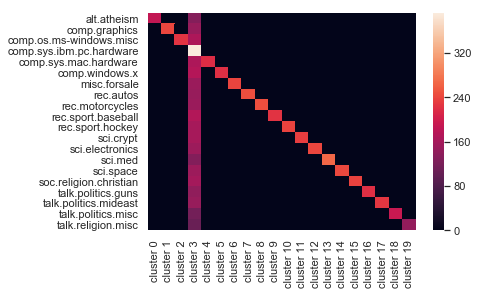

In [19]:
from sklearn.metrics import confusion_matrix

Y = dataset['target']

# some generated clusters
Clusters = Y.copy()
Clusters[:3000] = 3

cm = confusion_matrix(Y,Clusters)
sns.heatmap(cm,
           yticklabels=dataset['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])